In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import pyod
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as st
import statsmodels.api as sm

In [2]:
df=pd.read_csv("C:/Users/prash/Pictures/Group 4_ForestCoverType/covtype.csv")
df.columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points','Rawah_Wilderness_Area','Neota_Wilderness_Area',
            'Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area',"Soil_code_2702",
                        "Soil_code_2703","Soil_code_2704","Soil_code_2705","Soil_code_2706","Soil_code_2717",
                        "Soil_code_3501","Soil_code_3502","Soil_code_4201","Soil_code_4703","Soil_code_4704",
                        "Soil_code_4744","Soil_code_4758","Soil_code_5101","Soil_code_5151","Soil_code_6101",
                        "Soil_code_6102","Soil_code_6731","Soil_code_7101","Soil_code_7102","Soil_code_7103",
                        "Soil_code_7201","Soil_code_7202","Soil_code_7700","Soil_code_7701","Soil_code_7702",
                        "Soil_code_7709","Soil_code_7710","Soil_code_7745","Soil_code_7746","Soil_code_7755",
                        "Soil_code_7756","Soil_code_7757","Soil_code_7790","Soil_code_8703","Soil_code_8707",
                        "Soil_code_8708","Soil_code_8771","Soil_code_8772","Soil_code_8776",'Cover_Type']

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth',100)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Rawah_Wilderness_Area,Neota_Wilderness_Area,Comanche_Peak_Wilderness_Area,Cache_la_Poudre_Wilderness_Area,Soil_code_2702,Soil_code_2703,Soil_code_2704,Soil_code_2705,Soil_code_2706,Soil_code_2717,Soil_code_3501,Soil_code_3502,Soil_code_4201,Soil_code_4703,Soil_code_4704,Soil_code_4744,Soil_code_4758,Soil_code_5101,Soil_code_5151,Soil_code_6101,Soil_code_6102,Soil_code_6731,Soil_code_7101,Soil_code_7102,Soil_code_7103,Soil_code_7201,Soil_code_7202,Soil_code_7700,Soil_code_7701,Soil_code_7702,Soil_code_7709,Soil_code_7710,Soil_code_7745,Soil_code_7746,Soil_code_7755,Soil_code_7756,Soil_code_7757,Soil_code_7790,Soil_code_8703,Soil_code_8707,Soil_code_8708,Soil_code_8771,Soil_code_8772,Soil_code_8776,Cover_Type,Distance_To_Hydrology,Hillshade
0,2590,56,2,390,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,212.08,202.00
1,2804,139,9,3180,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,275.77,202.33
2,2785,155,18,3090,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,269.24,199.33
3,2595,45,2,391,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,153.00,201.33
4,2579,132,6,67,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,300.37,202.33


In [6]:
numeric=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Distance_To_Hydrology', 'Hillshade']

# Treating Outliers

In [7]:
for i in numeric:        
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    count=0
    for j in df[i]:
        if j not in range(int(np.round(ll,0)),int(np.round(ul+1,0))):
            count=count+1
    print("The outlier percentage for ",i,'is ',np.round((count/df[i].shape[0])*100,2),'\n')

The outlier percentage for  Elevation is  2.68 

The outlier percentage for  Aspect is  0.0 

The outlier percentage for  Slope is  2.64 

The outlier percentage for  Horizontal_Distance_To_Roadways is  0.12 

The outlier percentage for  Horizontal_Distance_To_Fire_Points is  5.36 

The outlier percentage for  Distance_To_Hydrology is  91.45 

The outlier percentage for  Hillshade is  68.18 



In [9]:
##### percent of values within the mu+-3sigma range
for i in numeric:
    ul=df[i].mean()+(3*df[i].std())
    ll=df[i].mean()-(3*df[i].std())
    count=0
    for j in df[i]:
        if j not in range(int(np.round(ll,0)),int(np.round(ul+1,0))):
            count=count+1
    print("The outlier percentage for ",i,'is ',np.round((count/df[i].shape[0])*100,2),'\n')

The outlier percentage for  Elevation is  1.0 

The outlier percentage for  Aspect is  0.0 

The outlier percentage for  Slope is  0.52 

The outlier percentage for  Horizontal_Distance_To_Roadways is  0.01 

The outlier percentage for  Horizontal_Distance_To_Fire_Points is  1.87 

The outlier percentage for  Distance_To_Hydrology is  91.43 

The outlier percentage for  Hillshade is  67.57 



In [ ]:
df['Distance_To_Hydrology']=np.round(np.sqrt(df['Horizontal_Distance_To_Hydrology']**2+
                                             df['Vertical_Distance_To_Hydrology']**2),2)
df['Hillshade']=np.round((df['Hillshade_9am']+df['Hillshade_Noon']+
                                  df['Hillshade_3pm'])/3,2)
df.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
          'Hillshade_9am','Hillshade_Noon','Hillshade_3pm'], axis=1, inplace=True)

In [11]:
### Description Before Outlier treatment
df[numeric].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Hillshade
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,2350.149779,1980.283828,276.065559,192.664321
std,279.984569,111.913733,7.488234,1559.254343,1324.184340,217.047751,14.465671
min,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.670000
25%,2809.000000,58.000000,9.000000,1106.000000,1024.000000,108.460000,185.670000
50%,2996.000000,127.000000,13.000000,1997.000000,1710.000000,229.480000,195.330000
75%,3163.000000,260.000000,18.000000,3328.000000,2550.000000,393.810000,203.000000
max,3858.000000,360.000000,66.000000,7117.000000,7173.000000,1418.920000,213.670000


In [7]:
#### Capping the outliers
# Defining an function for Capping
def cap(x):
    if x<ll:
        return ll
    elif x>ul:
        return ul
    else:
        return x
    
for i in numeric:
    ul=df[i].mean()+(3*df[i].std())
    ll=df[i].mean()-(3*df[i].std())
    df[i]=df[i].apply(lambda x:cap(x))

In [13]:
### Description After Outlier treatment
df[numeric].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Hillshade
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2960.107889,155.656988,14.081115,2350.147791,1973.577207,274.552556,192.821585
std,277.539446,111.913733,7.409452,1559.248346,1302.552385,211.739154,13.869242
min,2119.412218,0.000000,0.000000,0.000000,0.000000,0.000000,149.267309
25%,2809.000000,58.000000,9.000000,1106.000000,1024.000000,108.460000,185.670000
50%,2996.000000,127.000000,13.000000,1997.000000,1710.000000,229.480000,195.330000
75%,3163.000000,260.000000,18.000000,3328.000000,2550.000000,393.810000,203.000000
max,3799.319634,360.000000,36.568425,7027.912807,5952.836848,927.208812,213.670000


# Before Statification of Split

In [14]:
from sklearn.model_selection import train_test_split
X=df.drop('Cover_Type',1)
y=df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# dd=pd.concat([X_working,y_working],axis=1)
pd.concat([df['Cover_Type'].value_counts(normalize=True).mul(100),y_train.value_counts(normalize=True).mul(100)
          ,y_test.value_counts(normalize=True).mul(100)],axis=1, keys=['Population','Train','Test'])

,Population,Train,Test
2,48.760006,48.747378,48.789471
1,36.460583,36.444172,36.498876
3,6.153756,6.162176,6.134111
7,3.530054,3.550468,3.482422
6,2.989100,2.991343,2.983867
5,1.633704,1.630412,1.641385
4,0.472797,0.474051,0.469869


# After Statification of split

In [8]:
from sklearn.model_selection import train_test_split
X=df.drop('Cover_Type',1)
y=df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                                                            stratify=df['Cover_Type'])
# dd=pd.concat([X_working,y_working],axis=1)
pd.concat([df['Cover_Type'].value_counts(normalize=True).mul(100),y_train.value_counts(normalize=True).mul(100)
          ,y_test.value_counts(normalize=True).mul(100)],axis=1, keys=['Population','Train','Test'])

,Population,Train,Test
2,48.760006,48.759918,48.760212
1,36.460583,36.460646,36.460437
3,6.153756,6.153816,6.153617
7,3.530054,3.530060,3.530039
6,2.989100,2.989130,2.989031
5,1.633704,1.633608,1.633927
4,0.472797,0.472822,0.472737


# Feature Sellection

## Based on Chi2 (Univariate selection)

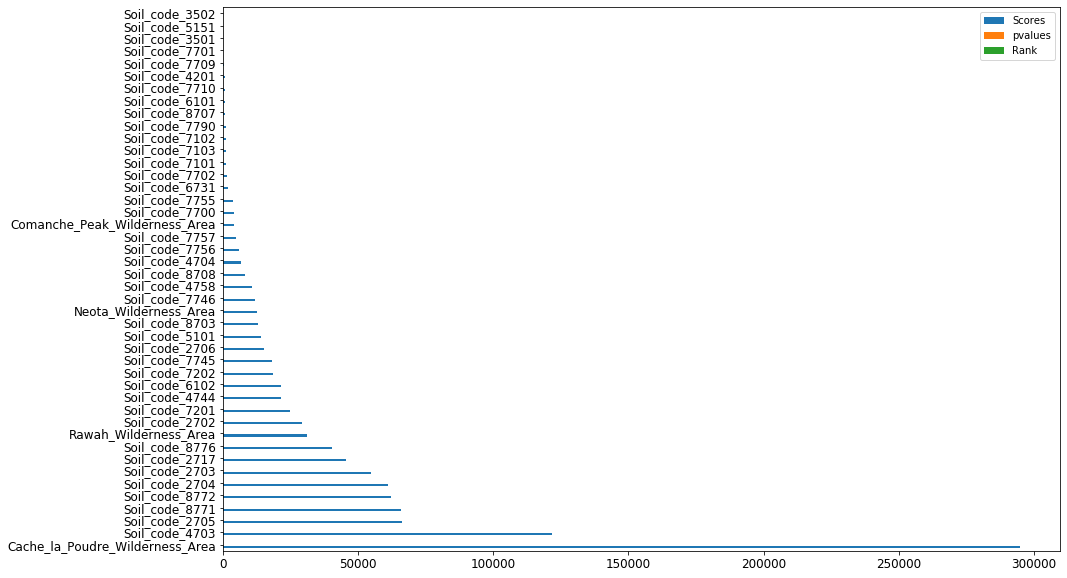

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=df[df.columns[5:49]]
Y=df['Cover_Type']
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, Y)
scoreschi2=pd.DataFrame(index=X.columns)
scoreschi2['Scores']=fit.scores_ 
scoreschi2['pvalues']=fit.pvalues_
scoreschi2['Rank']=scoreschi2['Scores'].rank(method='dense',ascending=False )
scoreschi2=scoreschi2.sort_values(by='Rank')
scoreschi2.plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
scoreschi2['Scores']=scoreschi2['Scores'].apply(lambda x
                                                : (x/scoreschi2['Scores'].sum()))

In [19]:
scoreschi2

,Scores,pvalues,Rank
Cache_la_Poudre_Wilderness_Area,0.266960,0.000000e+00,1.0
Soil_code_4703,0.110353,0.000000e+00,2.0
Soil_code_2705,0.060088,0.000000e+00,3.0
Soil_code_8771,0.059469,0.000000e+00,4.0
Soil_code_8772,0.056235,0.000000e+00,5.0
Soil_code_2704,0.055308,0.000000e+00,6.0
Soil_code_2703,0.049745,0.000000e+00,7.0
Soil_code_2717,0.041331,0.000000e+00,8.0
Soil_code_8776,0.036524,0.000000e+00,9.0
Rawah_Wilderness_Area,0.028061,0.000000e+00,10.0


## Based on Anova (Univariate selection)

,Scores,pvalues,Rank
Elevation,0.833152,0.0,1.0
Horizontal_Distance_To_Roadways,0.055159,0.0,2.0
Slope,0.041718,0.0,3.0
Horizontal_Distance_To_Fire_Points,0.039749,0.0,4.0
Hillshade,0.016593,0.0,5.0
Distance_To_Hydrology,0.011230,0.0,6.0
Aspect,0.002398,0.0,7.0


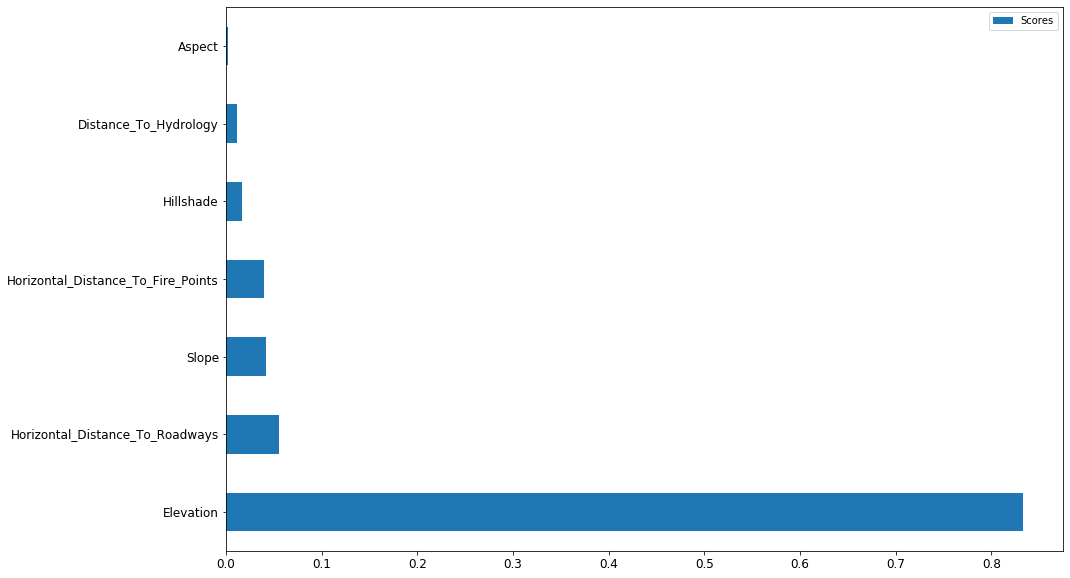

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X=df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
     'Distance_To_Hydrology', 'Hillshade']]
Y=df['Cover_Type']
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, Y)
anova=pd.DataFrame(index=X.columns)
anova['Scores']=fit.scores_ 
anova['pvalues']=fit.pvalues_
anova['Rank']=anova['Scores'].rank(method='dense',ascending=False )
anova=anova.sort_values(by='Rank')
anova['Scores']=anova['Scores'].apply(lambda x: (x/anova['Scores'].sum()))
anova['Scores'].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
anova

## BASED ON MUTUAL (UNIVARIATE SELLECTION)

,Scores,Rank
Elevation,0.456891,1.0
Cache_la_Poudre_Wilderness_Area,0.147356,2.0
Horizontal_Distance_To_Roadways,0.088945,3.0
Rawah_Wilderness_Area,0.080711,4.0
Horizontal_Distance_To_Fire_Points,0.069822,5.0
Soil_code_4703,0.063522,6.0
Distance_To_Hydrology,0.056284,7.0
Slope,0.037234,8.0
Soil_code_7745,0.031266,9.0
Soil_code_8771,0.030800,10.0


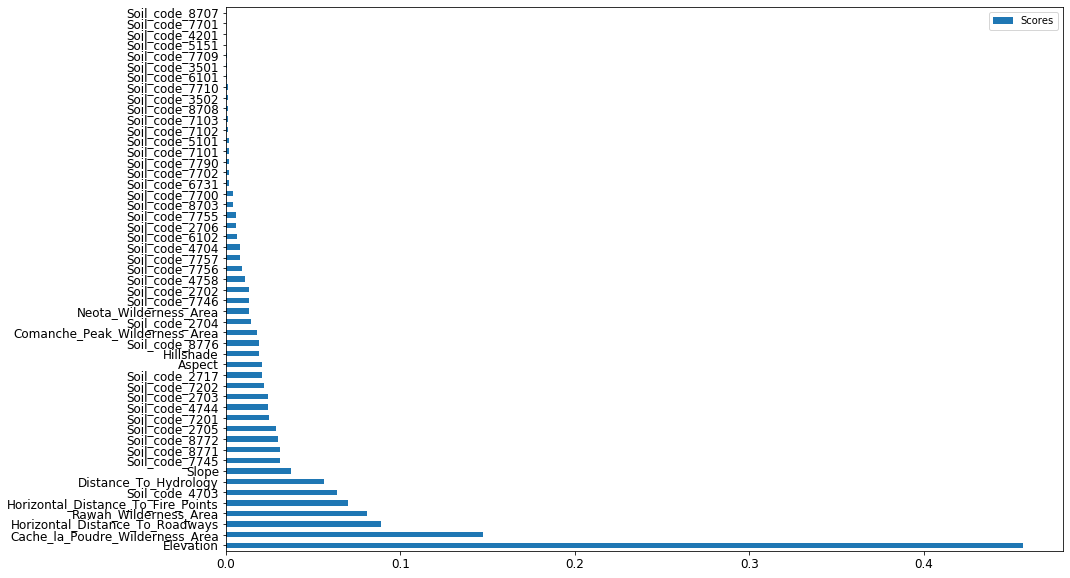

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
X=df.drop('Cover_Type',axis=1)
Y=df['Cover_Type']
test = SelectKBest(score_func=mutual_info_classif, k='all')
fit = test.fit(X, Y)
mutual=pd.DataFrame(index=X.columns)
mutual['Scores']=fit.scores_ 
mutual['Rank']=mutual['Scores'].rank(method='dense',ascending=False )
mutual=mutual.sort_values(by='Rank')
mutual['Scores'].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=12)
mutual

## Recursive Feature Elimination

In [14]:
#LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X=df.drop('Cover_Type',1)
Y=df['Cover_Type']
#Feature extraction
model = LogisticRegression() 
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Num Features: 1
Selected Features: [False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
Feature Ranking: [ 5  4  1  7  6  9 16 14  8 31 23 30 19 34 27 49 50 39 13 26 15 21 44 51
 43 32 41 36 38 40 10 11 28 47 35 46 42 12 20 29 22 25 37 33 48 45 17 18
 24  3  2]


In [19]:
refsum=pd.DataFrame(data=fit.ranking_,index=X.columns)
refsum=refsum.sort_values(by=0)
refsum

,0
Slope,1
Hillshade,2
Distance_To_Hydrology,3
Aspect,4
Elevation,5
Horizontal_Distance_To_Fire_Points,6
Horizontal_Distance_To_Roadways,7
Cache_la_Poudre_Wilderness_Area,8
Rawah_Wilderness_Area,9
Soil_code_7201,10


# Balancing Using SMOTE

In [22]:
sm = SMOTE(random_state=42)
X_res, y_res = X_train, y_train 
X_train, y_train = sm.fit_resample(X_res, y_res)

In [23]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape (1388170, 51)
y_train.shape (1388170,)


# Logistic Regression

In [11]:
# install in anaconda prompt
# conda install -c conda-forge imbalanced-learn

In [11]:
LRestim=LogisticRegression(random_state=42,multi_class='multinomial')
LRparam={'penalty':['none','elasticnet'],'C':[1.0,0.1,0.001],
         'class_weight':['balanced'],'solver':['saga']}  
LRCV=RandomizedSearchCV(estimator=LRestim,param_distributions=LRparam
                        ,n_jobs=-1,cv=5,random_state=42)
best_parameter_search = LRCV.fit(X_train, y_train)
best_parameter_search.best_params_

{'solver': 'saga', 'penalty': 'none', 'class_weight': 'balanced', 'C': 1.0}

In [12]:
pd.DataFrame(best_parameter_search.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.540198,"{'solver': 'saga', 'penalty': 'none', 'class_weight': 'balanced', 'C': 1.0}"
1,NaN,"{'solver': 'saga', 'penalty': 'elasticnet', 'class_weight': 'balanced', 'C': 1.0}"
2,0.540198,"{'solver': 'saga', 'penalty': 'none', 'class_weight': 'balanced', 'C': 0.1}"
3,NaN,"{'solver': 'saga', 'penalty': 'elasticnet', 'class_weight': 'balanced', 'C': 0.1}"
4,0.540198,"{'solver': 'saga', 'penalty': 'none', 'class_weight': 'balanced', 'C': 0.001}"
5,NaN,"{'solver': 'saga', 'penalty': 'elasticnet', 'class_weight': 'balanced', 'C': 0.001}"


In [24]:
#Chosen the Best paramerts given
LR = LogisticRegression(penalty='none',C=1,class_weight='balanced',solver='saga',
                        random_state=42,multi_class='multinomial')
LR.fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
trainLR=LR.predict(X_train)
cm= confusion_matrix(y_test,y_pred_LR)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['Recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                  (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                  (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                  (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',recall_score(y_train, trainLR, average='weighted'))
print('Test Recall',recall_score(y_test,y_pred_LR, average='weighted'))
print(a['Recall'])

Train Recall 0.5474401550242406
Test Recall 0.45323687350835323
1    48.94
2    40.45
3    39.84
4    69.05
5    62.78
6    36.78
7    80.79
Name: Recall, dtype: float64


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
tree_param = {"criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":[14,16,18,20,22,25,30,35],
    "max_features":["auto","sqrt","log2"],}
grid = RandomizedSearchCV(estimator=tree, param_distributions=tree_param,
                          cv = 5,random_state=42)
best_parameter_search_DT = grid.fit(X_train, y_train)
best_parameter_search_DT.best_params_

{'splitter': 'best',
 'max_features': 'auto',
 'max_depth': 35,
 'criterion': 'gini'}

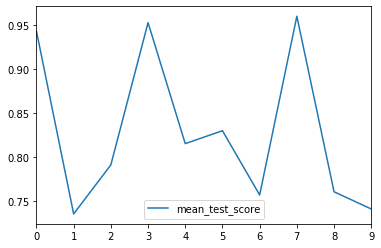

In [19]:
pd.DataFrame(best_parameter_search_DT.cv_results_)[['mean_test_score']].plot()

In [20]:
pd.DataFrame(best_parameter_search_DT.cv_results_)[['mean_test_score','param_max_depth','params']]

,mean_test_score,param_max_depth,params
0,0.943549,25,"{'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'entropy'}"
1,0.735546,22,"{'splitter': 'random', 'max_features': 'log2', 'max_depth': 22, 'criterion': 'entropy'}"
2,0.791317,22,"{'splitter': 'random', 'max_features': 'auto', 'max_depth': 22, 'criterion': 'entropy'}"
3,0.953202,35,"{'splitter': 'best', 'max_features': 'log2', 'max_depth': 35, 'criterion': 'entropy'}"
4,0.815538,25,"{'splitter': 'random', 'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'gini'}"
5,0.830225,25,"{'splitter': 'random', 'max_features': 'auto', 'max_depth': 25, 'criterion': 'entropy'}"
6,0.757090,20,"{'splitter': 'random', 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}"
7,0.960492,35,"{'splitter': 'best', 'max_features': 'auto', 'max_depth': 35, 'criterion': 'gini'}"
8,0.760741,14,"{'splitter': 'best', 'max_features': 'auto', 'max_depth': 14, 'criterion': 'gini'}"
9,0.741135,16,"{'splitter': 'best', 'max_features': 'log2', 'max_depth': 16, 'criterion': 'gini'}"


In [25]:
#Based on the above table best features manually  sellected
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=25,
                          max_features='sqrt',random_state=42,class_weight='balanced')
DT.fit(X_train,y_train)
DTpred=DT.predict(X_test)
trainDT=DT.predict(X_train)
cm= confusion_matrix(y_test,DTpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',recall_score(y_train, trainDT, average='weighted'))
print('Test Recall',recall_score(y_test,DTpred, average='weighted'))
a['recall']

Train Recall 0.9605178040153584
Test Recall 0.8523499173857169


1    84.34
2    84.84
3    88.95
4    86.17
5    85.74
6    83.80
7    94.23
Name: recall, dtype: float64

In [26]:
DT=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=35,
                          max_features='log2',random_state=42,class_weight='balanced')
DT.fit(X_train,y_train)
DTpred=DT.predict(X_test)
trainDT=DT.predict(X_train)
cm= confusion_matrix(y_test,DTpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',recall_score(y_train, trainDT, average='weighted'))
print('Test Recall',recall_score(y_test,DTpred, average='weighted'))
a['recall']

Train Recall 0.99008334714048
Test Recall 0.8774612171837709


1    86.96
2    88.22
3    89.94
4    81.80
5    79.85
6    84.05
7    93.03
Name: recall, dtype: float64

In [27]:
DT=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=35,
                          max_features='auto',random_state=42,class_weight='balanced')
DT.fit(X_train,y_train)
DTpred=DT.predict(X_test)
trainDT=DT.predict(X_train)
cm= confusion_matrix(y_test,DTpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',recall_score(y_train, trainDT, average='weighted'))
print('Test Recall',recall_score(y_test,DTpred, average='weighted'))
a['recall']

Train Recall 0.9972582608758294
Test Recall 0.8915802276482467


1    88.91
2    89.73
3    89.78
4    82.04
5    81.00
6    82.48
7    93.11
Name: recall, dtype: float64

# Random Forest

In [28]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)
trainRF=rf.predict(X_train)
cm= confusion_matrix(y_test,rfpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',recall_score(y_train, trainRF, average='weighted'))
print('Test Recall',recall_score(y_test,rfpred, average='weighted'))
print(a['recall'])

Train Recall 1.0
Test Recall 0.9578781898292638
1    95.11
2    96.56
3    96.24
4    90.17
5    89.54
6    93.42
7    96.96
Name: recall, dtype: float64


In [29]:
# After Feature Sellection
Percent =[]
Features=[]
Total_Recall_Train=[]
Total_Recall_Test=[]
Min_Recall_Test=[]
IndRecall=pd.DataFrame(index=[1,2,3,4,5,6,7])
X_train=pd.DataFrame(data=X_train,columns=X.columns)
from sklearn.ensemble import RandomForestClassifier
for i in ['.01','.02','0.03','0.04','0.05']:
    Percent.append(i)
    rf = RandomForestClassifier(n_jobs=-1, random_state=42)
    rf.fit(X_train,y_train)
    feat_imp_RF = rf.feature_importances_
    colsrf = X.columns[feat_imp_RF >= np.float(i)]
    Features.append(len(colsrf))
    rf_imp = RandomForestClassifier(n_jobs=-1, random_state=42)
    rf_imp=rf_imp.fit(X_train[colsrf], y_train)
    rfpred_imp=rf_imp.predict(X_test[colsrf])
    cm= confusion_matrix(y_test,rfpred_imp)
    a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
    a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
    a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
    trainRF_imp=rf_imp.predict(X_train[colsrf])
    Total_Recall_Train.append(recall_score(y_train, trainRF_imp, average='weighted'))
    Total_Recall_Test.append(recall_score(y_test,rfpred_imp, average='weighted'))
    Min_Recall_Test.append(a['recall'].min())
    IndRecall[i]=a['recall']

In [30]:
summaryRF= pd.DataFrame({'Percent':Percent,'Features':Features,
                      'Total_Recall_Train':Total_Recall_Train,
                         'Total_Recall_Test':Total_Recall_Test,'Min_Recall_Test':Min_Recall_Test})
print(summaryRF)
print(IndRecall)

  Percent  Features  Total_Recall_Train  Total_Recall_Test  Min_Recall_Test
0     .01        17            1.000000           0.956450            89.85
1     .02        12            1.000000           0.947993            88.83
2    0.03         8            1.000000           0.945882            88.83
3    0.04         7            1.000000           0.951499            90.13
4    0.05         5            0.999999           0.954384            90.59
     .01    .02   0.03   0.04   0.05
1  95.11  94.38  94.09  94.88  95.56
2  96.22  95.18  95.05  95.45  95.65
3  96.29  96.00  95.33  95.78  95.03
4  91.38  91.02  91.63  92.48  91.50
5  89.85  88.83  88.83  90.13  90.59
6  93.67  92.80  92.48  93.22  92.61
7  97.06  96.67  96.86  97.12  97.17


# RandomForest hyperparameter with (95% Variance)

In [31]:
RFtree = RandomForestClassifier(n_jobs=-1,random_state=42,class_weight='balanced',max_depth=25)
RFtree_param = {"criterion":["gini", "entropy"],'n_estimators':[50,100,150,200]}
RFgrid = RandomizedSearchCV(estimator=RFtree, param_distributions=RFtree_param,
                          cv = 5,random_state=42)
best_parameter_search_RF = RFgrid.fit(X_train[colsrf], y_train)
best_parameter_search_RF.best_params_

{'n_estimators': 200, 'criterion': 'entropy'}

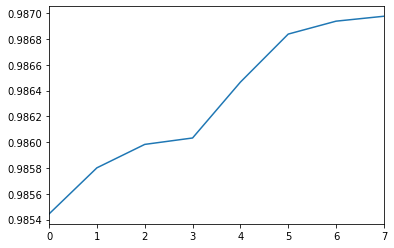

,mean_test_score,param_n_estimators,params
0,0.985443,50,"{'n_estimators': 50, 'criterion': 'gini'}"
1,0.985801,100,"{'n_estimators': 100, 'criterion': 'gini'}"
2,0.985982,150,"{'n_estimators': 150, 'criterion': 'gini'}"
3,0.986032,200,"{'n_estimators': 200, 'criterion': 'gini'}"
4,0.986465,50,"{'n_estimators': 50, 'criterion': 'entropy'}"
5,0.986837,100,"{'n_estimators': 100, 'criterion': 'entropy'}"
6,0.986937,150,"{'n_estimators': 150, 'criterion': 'entropy'}"
7,0.986976,200,"{'n_estimators': 200, 'criterion': 'entropy'}"


In [32]:
pd.DataFrame(best_parameter_search_RF.cv_results_)['mean_test_score'].plot()
plt.show()
pd.DataFrame(best_parameter_search_RF.cv_results_)[['mean_test_score','param_n_estimators','params']]

In [33]:
X_train=pd.DataFrame(data=X_train,columns=X.columns)
rf = RandomForestClassifier(n_jobs=-1,criterion='entropy',n_estimators=50,random_state=42,
                            class_weight='balanced',max_depth=25)
rf.fit(X_train[colsrf],y_train)
rfpred=rf.predict(X_test[colsrf])
trainRF=rf.predict(X_train[colsrf])
cm= confusion_matrix(y_test,rfpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',recall_score(y_train, trainRF, average='weighted'))
print('Test Recall',recall_score(y_test,rfpred, average='weighted'))
print(a['recall'])

Train Recall 0.9998357549867811
Test Recall 0.9531450798604737
1    95.46
2    95.47
3    94.72
4    91.63
5    91.22
6    92.61
7    97.40
Name: recall, dtype: float64


In [34]:
print('The required Columns are:',colsrf)

The required Columns are: Index(['Elevation', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Distance_To_Hydrology'],
      dtype='object')


# Naive Bayes

In [35]:
from  sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB=NB.fit(X_train,y_train)
NBpred=NB.predict(X_test)
cm= confusion_matrix(y_test,NBpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
trainNB=NB.predict(X_train)
print('Train Recall',recall_score(y_train, trainNB, average='weighted'))
print('Test Recall',recall_score(y_test,NBpred, average='weighted'))
print(a['recall'])

Train Recall 0.3175173069580815
Test Recall 0.26297732696897375
1    25.56
2    24.52
3    49.60
4    50.49
5    35.57
6    12.63
7    21.83
Name: recall, dtype: float64


In [36]:
#Navie Bayes Feature enginered (Not Required Low Recall)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_param = {"n_neighbors":[3,4,5,6],
    "p":[1,2],
    "leaf_size":[30,40,50]}
knncv = RandomizedSearchCV(estimator=knn, param_distributions=knn_param,
                          cv = 5,random_state=42)
best_parameter_search_knn = knncv.fit(X_train, y_train)
best_parameter_search_knn.best_params_

{'p': 1, 'n_neighbors': 3, 'leaf_size': 40}

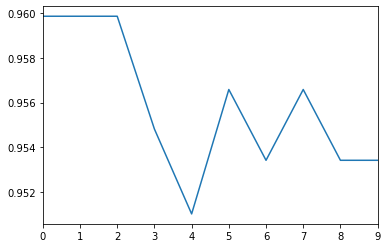

,mean_test_score,param_n_neighbors,params
0,0.959858,3,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 40}"
1,0.959858,3,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 50}"
2,0.959858,3,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 30}"
3,0.954815,4,"{'p': 1, 'n_neighbors': 4, 'leaf_size': 50}"
4,0.951021,4,"{'p': 2, 'n_neighbors': 4, 'leaf_size': 40}"
5,0.956583,3,"{'p': 2, 'n_neighbors': 3, 'leaf_size': 40}"
6,0.953419,5,"{'p': 2, 'n_neighbors': 5, 'leaf_size': 40}"
7,0.956583,3,"{'p': 2, 'n_neighbors': 3, 'leaf_size': 30}"
8,0.953419,5,"{'p': 2, 'n_neighbors': 5, 'leaf_size': 50}"
9,0.953419,5,"{'p': 2, 'n_neighbors': 5, 'leaf_size': 30}"


In [10]:
pd.DataFrame(best_parameter_search_knn.cv_results_)['mean_test_score'].plot()
plt.show()
pd.DataFrame(best_parameter_search_knn.cv_results_)[['mean_test_score','param_n_neighbors','params']]

In [11]:
knn=KNeighborsClassifier(n_neighbors=3,p=1,leaf_size=40)
knn=knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
cm= confusion_matrix(y_test,knnpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
trainknn=knn.predict(X_train)
print('Train Recall',recall_score(y_train, trainknn, average='weighted'))
print('Test Recall',recall_score(y_test,knnpred, average='weighted'))
print(a['recall'])

Train Recall 0.9869267064496062
Test Recall 0.9636497154396916
1    96.48
2    97.05
3    95.81
4    79.98
5    88.38
6    92.30
7    95.94
Name: recall, dtype: float64


In [13]:
#Working with columns for random forest
colsrf=['Elevation', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Distance_To_Hydrology']
knn=KNeighborsClassifier(n_neighbors=3,p=1,leaf_size=40)
knn=knn.fit(X_train[colsrf],y_train)
knnpred=knn.predict(X_test[colsrf])
cm= confusion_matrix(y_test,knnpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
trainknn=knn.predict(X_train[colsrf])
print('Train Recall',recall_score(y_train, trainknn, average='weighted'))
print('Test Recall',recall_score(y_test,knnpred, average='weighted'))
print(a['recall'])

Train Recall 0.9843204075661348
Test Recall 0.9580675142280154
1    96.00
2    96.56
3    94.84
4    78.64
5    86.90
6    90.86
7    95.73
Name: recall, dtype: float64
